In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'
!kaggle datasets download -d abhia1999/chronic-kidney-disease
!unzip \*.zip && rm *.zip

  0% 0.00/5.61k [00:00<?, ?B/s]
100% 5.61k/5.61k [00:00<00:00, 7.89MB/s]
Archive:  chronic-kidney-disease.zip
  inflating: new_model.csv           


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load Data
data = pd.read_csv('/content/new_model.csv')  # Replace '/path/to/your/dataset.csv' with the actual path

# Step 2: Prepare Data
X = data[['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo']]
y = data['Class']  # Assuming 'Target' is the target variable name

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Fit Gaussian Mixture Model (GMM)
n_components = 5  # Number of mixture components
gmm = GaussianMixture(n_components=n_components)
cluster_labels_train = gmm.fit_predict(X_train_scaled)
cluster_centers = gmm.means_

# Step 6: Classify Test Data using KNN within each cluster
k = 5  # Number of neighbors
y_pred = []
for x_test_point in X_test_scaled:
    # Find the nearest cluster center
    nearest_cluster_index = np.argmin(np.linalg.norm(cluster_centers - x_test_point, axis=1))
    # Get indices of data points in the nearest cluster
    nearest_cluster_indices = np.where(cluster_labels_train == nearest_cluster_index)[0]
    # Extract data points and labels within the nearest cluster
    X_nearest_cluster = X_train_scaled[nearest_cluster_indices]
    y_nearest_cluster = y_train.iloc[nearest_cluster_indices]
    # Apply KNN to data points within the nearest cluster
    knn_model = KNeighborsClassifier(n_neighbors=k)  # Example: K=5
    knn_model.fit(X_nearest_cluster, y_nearest_cluster)
    # Predict the class of the test point
    predicted_class = knn_model.predict([x_test_point])[0]
    y_pred.append(predicted_class)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.975
Precision: 0.975
Recall: 0.975
F1 Score: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



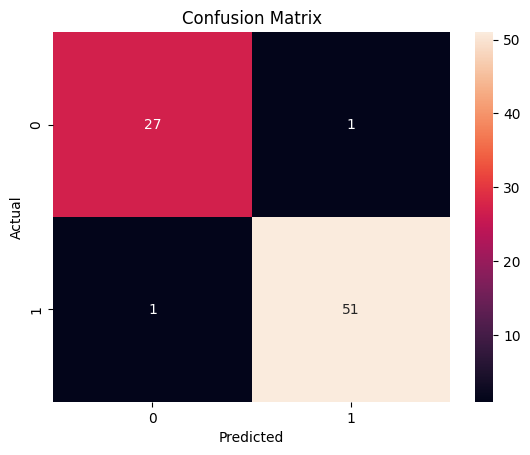

In [3]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()